# Régression Polynomiale, courbes d'apprentissage

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
np.random.seed(42)

**Question** Vous avez un ensemble d'entraînement disponible dans dans `data.csv`. Le charger dans un dataframe `df_train`.

In [38]:
df_train = pd.read_csv('data.csv')

df_train

,x,t
0,0.140280,9.880310
1,0.903858,10.227492
2,0.535815,10.163115
3,0.358392,9.937107
4,0.024342,9.881466
5,0.024334,9.919412
6,0.003374,9.970300
7,0.750261,10.380997
8,0.361339,9.972572
9,0.501367,10.038556


**Question** Regarder les 5 premières lignes et afficher des statistiques descriptives,  tracer l'ensemble des points en mettant la variable à prédire `t` en ordonnée. Vous pouvez appeler `X` et `y` les objets contenant la description des données et la variable à prédire

In [39]:
df_train.iloc[0:5].describe()

,x,t
count,5.000000,5.000000
mean,0.392537,10.017898
std,0.347255,0.165143
min,0.024342,9.880310
25%,0.140280,9.881466
50%,0.358392,9.937107
75%,0.535815,10.163115
max,0.903858,10.227492


<AxesSubplot:xlabel='x', ylabel='t'>

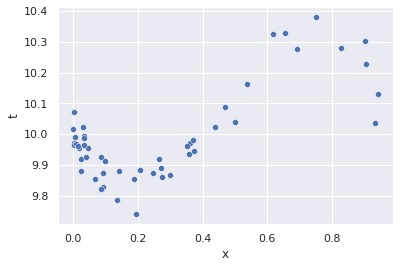

In [40]:
sns.scatterplot(x='x',y='t',data=df_train)

In [41]:
X = df_train.iloc[:,:1]
y = df_train.iloc[:,1:]

**Question** Découpez `X` et `y` en 2/3 et 1/3 pour créer des ensembles d'entraînement et de validation

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test = train_test_split(X,test_size=0.33,random_state=42)
y_train,y_test = train_test_split(y,test_size=0.33,random_state=42)

**Question** Faire une régression lineaire sur ce jeu de données d'entraînement et estimer son score sur l'échantillon de validation. 

In [77]:
from sklearn import linear_model

In [78]:
lr = linear_model.LinearRegression()

In [79]:
lr.fit(X_train, y_train)
lr_predictions= lr.predict(X_test)

In [80]:
lr.score(X_test, y_test)

0.38765059933087476

**Question** Tracer dans un diagamme, les points en bleu pour les données d'apprentissage, en rouge pour les données de validation et en noir la droite de régression qui vient d'être calculée.

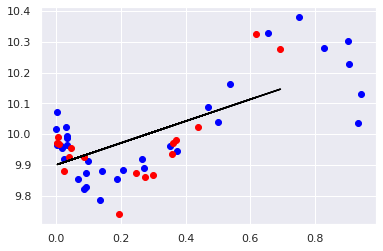

In [85]:
plt.scatter(X_train,y_train,color = 'blue')
plt.scatter(X_test,y_test,color= 'red')
plt.plot(X_test,lr_predictions,color = 'black')

## Ajouter des attributs, régression polynomiale

**Question** Dans les attributs décrivant les données, ajouter le carré de `X`. On doit avoir après cette manipulation `X2_train` et  `X2_valid` de dimensions (50,2)

In [86]:
X2_train = np.hstack((X_train,X_train**2))

In [99]:
X2_valid = np.hstack((X_test,X_test**2))

**Question** Réentraîner le classifieur linéaire avec cette nouvelle description des données (donc les attributs $x$ et $x^2$).

In [107]:
lr.fit(X2_train, y_train)
lr_predictions= lr.predict(X2_valid)

**Question** Tracer maintenant dans un diagamme, les points en bleu pour les données d'apprentissage, en rouge pour les données de test et en noir la courbe de régression qui vient d'être calculée.

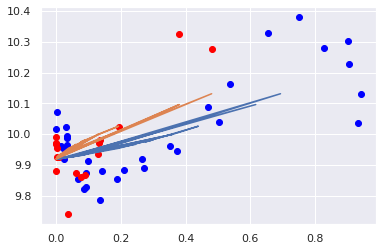

In [116]:
plt.scatter(X_train,y_train,color = 'blue')
plt.scatter(X2_test,y_test,color= 'red')
plt.plot(X2_valid,lr_predictions)

**Question** Écrire maintenant une fonction `poly` qui prend en argument un jeu de données `X` et un degré `d` et qui calcule une nouvelle représentation avec tous les monômes entre 1 et `d`.

    # Exemple : 
    poly(X, 3)
    array([[1.40280301e-01, 1.96785627e-02, 2.76051470e-03],
       [9.03857692e-01, 8.16958728e-01, 7.38414431e-01],
       [5.35815131e-01, 2.87097854e-01, 1.53831374e-01],
       [3.58391981e-01, 1.28444812e-01, 4.60335905e-02],
       [2.43418162e-02, 5.92524014e-04, 1.44231106e-05],
       [2.43342904e-02, 5.92157688e-04, 1.44097371e-05], ...

In [121]:
def poly(x,d): 

SyntaxError: unexpected EOF while parsing (<ipython-input-121-d025902f3d12>, line 1)

**Question** Construire une liste avec tous les scores de la régression pour 20 représentations des données comprenant tous les monômes de 1 à 20 : (le $i^e$ résultat contient tous les monômes de 1 à $i$).

**Question** Que constatez-vous. Pouvez-vous expliquer ce qui se produit ? Pourquoi les résultats se dégradent-ils quand la représentation des données est de plus en plus riche ?  

*Entrez votre réponse ici*

On va refaire cela avec les outils de scikit-learn.

**Question** importez `PolynomialFeatures` de `sklearn.preprocessing`. Utilisez cela pour créer une représentation de X avec le degré 3. Cela donne quelque chose comme : 

     array([[1.00000000e+00, 1.73907352e-01, 3.02437672e-02, 5.25961348e-03],
       [1.00000000e+00, 5.18867376e-01, 2.69223354e-01, 1.39691215e-01],
       [1.00000000e+00, 1.30815988e-08, 1.71128228e-16, 2.23863083e-24],
       [1.00000000e+00, 9.14049845e-02, 8.35487119e-03, 7.63676871e-04],
       [1.00000000e+00, 2.15372915e-02, 4.63854925e-04, 9.99017872e-06], ...

In [122]:
from sklearn.preprocessing import PolynomialFeatures

*Aide* En python, on peut donner en argument un dictionnaire de paramètres 

In [123]:
dic = {'loc':5, 'scale':2}
print(np.random.normal(size=5, **dic))

def f(x, **kwargs):
    return [i>0 for i in np.random.normal(size=x, **kwargs)]

print(f(10))
print(f(10, loc=20))
print(f(10, loc=20, scale=100))
dic = {'loc':5, 'scale':2}
print(f(10,**dic))

[3.56031158 4.07872246 7.11424445 5.68723658 1.47391969]
[True, False, False, True, True, True, False, False, True, True]
[True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, False, True, True, False, True, False]
[True, True, True, True, True, True, True, True, True, True]


**Question** Il existe une fonction `make_pipeline` dans `sklearn` qui permet d'enchaîner des opérations très simplement. Définissez une nouvelle fonction `ma_regression` qui prend en argument un degré et une liste d'autres arguments destinés à la fonction `LinearRegression` et compose un changement de représentation polynomial et une régression.

In [ ]:
def ma_regression(d,l):
    

**Question**  Utilisez cette fonction pour estimer l'erreur d'une regression linéaire avec transformations polynomiales jusqu'au degré 3.

## Courbe d'apprentissage en fonction du degré

**Question** En utilisant `validation_curve`, réaliser une validation croisée 5 fois sur `X_train` en appliquant tous les changements de représentation avec un degré entre 1 et `max_degree` que nous fixons à 15. Pour cela, regardez l'aide de `validation_curve` dans `sklearn.model_selection`. Utilisez bien-sûr `ma_regression`. Cela donne des scores de validation comme cela :

     [[ 0.49293082  0.66030384  0.65039394  0.69193837  0.6167657 ]
      [ 0.57202662  0.66235604  0.60475979  0.73104306  0.61910942]
      ...
      [ 0.87350381  0.93056784 -0.56590723  0.87945086  0.87330041]]

*Aide* : Dans les pipelines, on accède aux paramètres des éléments du pipeline avec la syntaxe `element__parametre`. Par défaut le nom de l'élément est le nom de la classe en minuscules.

**Question** On peut donc ensuite tracer les courbes d'erreur d'entraînement et de validation. Puisqu'on a de la validation sur 5 parties, on obtient 5 résultats par degré. Pour la courbe on trace la valeur mediane (la moyenne sur 5 valeurs pouvant être plus fortement affectée par un très bon ou très mauvais résultat. Cela doit ressembler à cela. 

![validation et train](./validtrain.png)

**Question** Quelle est votre interprétation des résultats observés?

**Question** tracer maintenant la figure montrant la courbe estimée et les points dans l'échantillon de valid et de train. Pour cela, j'ai utilisé `linspace` pour obtenir 100 points espacés régulièrement de l'intervalle $[min(X),max(X)]$, j'ai calculé leur prédiction et utilisé `plot` pour tracer la courbe et `scatter` avec l'option `s` pour changer la taille des points. Par exemple pour le degré 3 cela donne cela, mais regardez pour plusieurs valeurs des degrés

![courbe finale](courbefinale.png)

## Courbe d'apprentissage en fonction de la taille de l'échantillon

Regardons maintenant la courbe d'apprentissage en fonction de la taille de l'échantillon. 

**Question** Lire le fichier `dataGrand.csv` et construire les matrices `X_g` (nd-array) et `y_g` (1d-array).

**Question** Utiliser maintenant `learning_curve` de la librairie `sklearn.model_selection`. En vous inspirant de l'exemple donné dans la [documentation](https://scikit-learn.org/stable/modules/learning_curve.html#validation-curve), calculez les résultats de l'apprentissage avec `ma_regression` pour les degrés $3, 5, 10, 15$ en prenant 10 tailles d'ensemble d'apprentissage entre 1% et 100% (avec `np.linspace(0.01, 1, 10)`)

**Question** Tracer les 4 courbes qui doivent ressemble à ce qui est ci-dessous et analysez les résultats. Qu'en concluez-vous ? 

![learning curve](learningCurve.png)

## Grid search

Ici, on va faire de la recherche d'hyperparamètres en examinant de nombreuses valeurs pour plusieurs paramètres : on construit une grille de plusieurs valeurs possible. On fait ce qu'on appelle du *grid search* qui est en général assez coûteux...

**Question** Charger les données de `dataPlusGrand.csv` dans `X_pg` et `y_pg`

**Question** faire un pipeline avec une transformation polynomiale des attributs et un estimateur de la classe `Ridge`

**Question** Regarder l'aide sur `GridSearchCV`. Composer une grille de recherche en examinant tous les degres entre 1 et 15 et pour les valeurs de alpha dans l'ensemble `[1e-3, 1e-2, 1e-1, 1]`

**Question** Quels sont les meilleurs paramètres ? Quel est le score du meilleur modèle sur `X_pg`, `y_pg` ?